In [2]:
import pandas as pd
import numpy as np
file_path = '/kaggle/input/mushroomsuci/agaricus-lepiota.data'
columns = [
    'class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
    'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
    'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
    'stalk_surface_below_ring', 'stalk_color_above_ring',
    'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
    'ring_type', 'spore_print_color', 'population', 'habitat'
]
df = pd.read_csv(file_path, header=None, names=columns)

In [7]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop("class", axis=1)
y = df["class"]

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


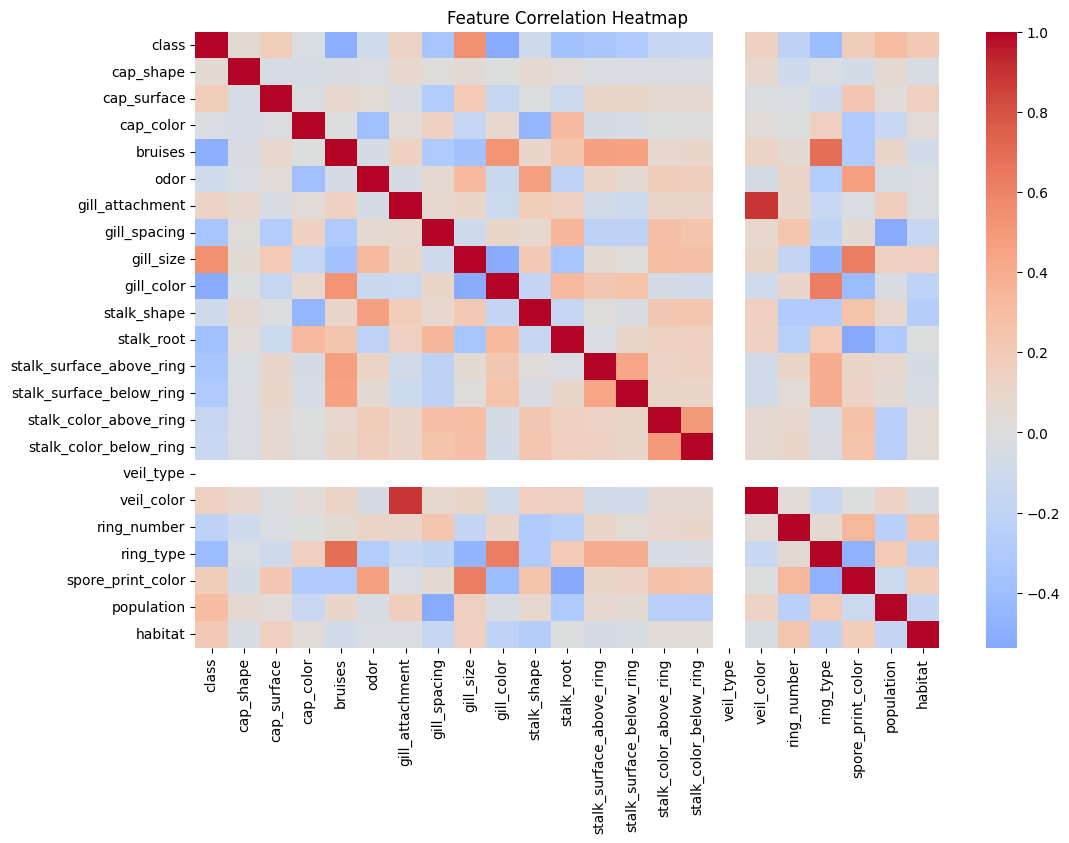

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

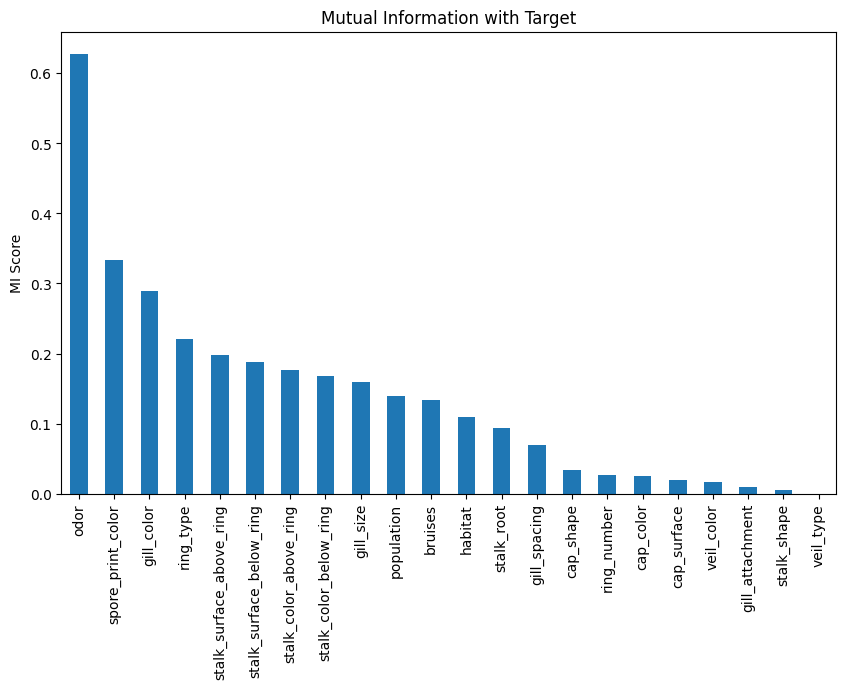

In [9]:
mi_scores = mutual_info_classif(X, y, discrete_features=True)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
mi_scores.plot(kind="bar")
plt.title("Mutual Information with Target")
plt.ylabel("MI Score")
plt.show()


In [10]:
print("Top 5 most informative features:")
print(mi_scores.head())

Top 5 most informative features:
odor                        0.628043
spore_print_color           0.333199
gill_color                  0.289027
ring_type                   0.220436
stalk_surface_above_ring    0.197357
dtype: float64


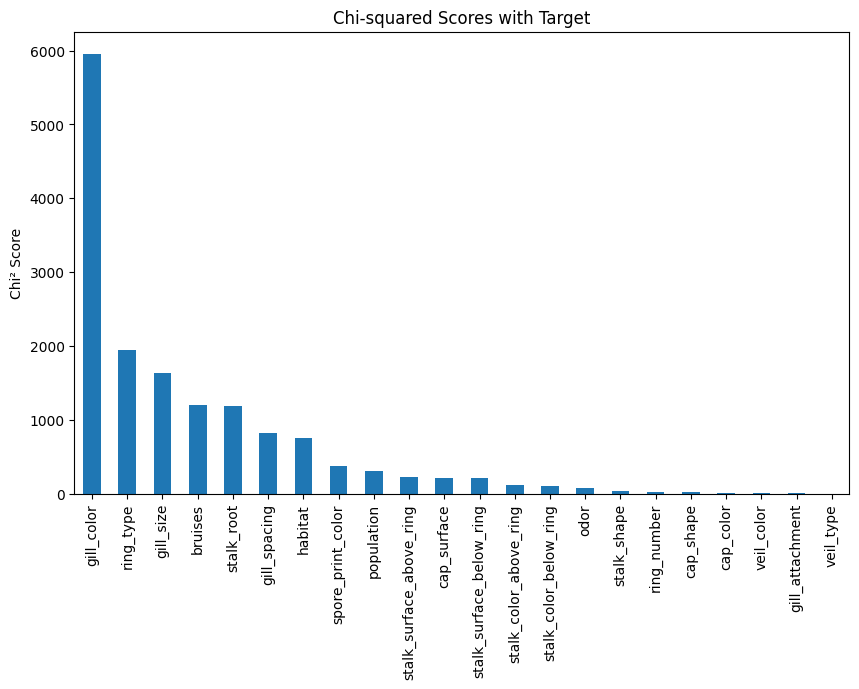

In [12]:
from sklearn.feature_selection import chi2, f_classif

chi_scores, p_values = chi2(X, y)
chi2_results = pd.Series(chi_scores, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
chi2_results.plot(kind="bar")
plt.title("Chi-squared Scores with Target")
plt.ylabel("Chi² Score")
plt.show()

In [13]:
print("Top 5 Chi-squared features:")
print(chi2_results.head())

Top 5 Chi-squared features:
gill_color    5957.764469
ring_type     1950.610146
gill_size     1636.606833
bruises       1194.277352
stalk_root    1186.029221
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


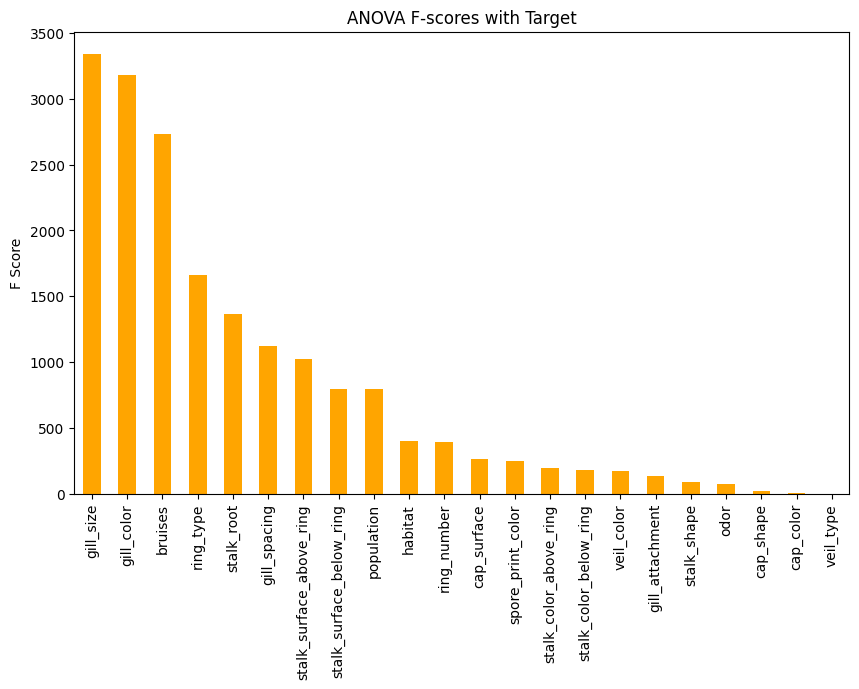

In [14]:
f_scores, p_values = f_classif(X, y)
anova_results = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
anova_results.plot(kind="bar", color="orange")
plt.title("ANOVA F-scores with Target")
plt.ylabel("F Score")
plt.show()

In [15]:
print("Top 5 ANOVA features:")
print(anova_results.head())

Top 5 ANOVA features:
gill_size     3343.699638
gill_color    3182.113373
bruises       2729.509760
ring_type     1658.306456
stalk_root    1365.372974
dtype: float64
